<a target="_blank" href="https://colab.research.google.com/github/victorlymarev/pandas/blob/main/notebooks/18-nulls.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Работа с пропусками
#### [Ссылка на видео](https://youtu.be/nGliucmJqEo)

In [ ]:
import pandas as pd
import os
import numpy as np

Читаем таблицу

In [ ]:
path_stocks = '../tables/stocks.parquet' if os.path.exists('../tables/stocks.parquet') else 'https://drive.google.com/uc?id=1weGquTtmR92mKYAeZhZCFHJjndyoSXZt'

stocks = pd.read_parquet(path_stocks).asfreq('d')
stocks.head()

#### Пропуски нельзя сравнивать на равенство

In [ ]:
(stocks['Цена'] == None).head()

In [ ]:
(stocks['Цена'] == np.nan).head()

In [ ]:
(stocks['Цена'] == pd.NA).head()

### isna или isnull
Методы проверяют пропущенно ли значение в ячейке

In [ ]:
stocks.isna().head()
# stocks.isnull()

### notna или notnull
Методы проверяют заполено ли значение в ячеке

In [ ]:
stocks.notna().head()
# stocks.notnull()

In [ ]:
stocks.notna().mean()

### dropna

Метод удяляет строки в которых есть пропуск

In [ ]:
stocks.dropna().head()

Если в параметр axis передать значение 1, то будут удаляться колонки, в которых есть пропуск

In [ ]:
(stocks
    .assign(one=1) # создаем новый столбец полнотью состоящий из единиц
    .dropna(axis=1)
    .head()
)

## fillna
Метод для заполнения пропущенных значений

In [ ]:
# заполняем пропуски нулем
stocks.fillna(0).head()

#### Заполняем пропуск средним значением по столбцу

In [ ]:
stocks.fillna(stocks.mean()).head()

In [ ]:
stocks['Цена'].fillna(stocks['Цена'].mean())

#### Заполнение ближайшим значением снизу

In [ ]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [ ]:
stocks_part = stocks.loc['2021-12-24':'2022-01-04', ['Цена', 'Откр.']].sample(10, random_state=42)
stocks_part

Даты здесь не играют никакой роли

In [ ]:
display_side_by_side(stocks_part,
                     
    stocks_part.fillna(method='bfill')
                    )

#### Заполнение ближайшим значением сверху

In [ ]:
display_side_by_side(stocks_part,
                     
    stocks_part.fillna(method='ffill')
                    )

#### Можно ставить пределы по заполнению значений

Заполнились только первые 2 строчки с пропусками

In [ ]:
display_side_by_side(stocks_part,
                     
    stocks_part.fillna(0, limit=2)
                    )

Если указать метод, то предел будет отсчитываться от ближайшего заполненного значения

In [ ]:
display_side_by_side(stocks_part,
                     
    stocks_part.fillna(method='ffill', limit=1)
                    )

### intrepolate
Интерполирует пропуски

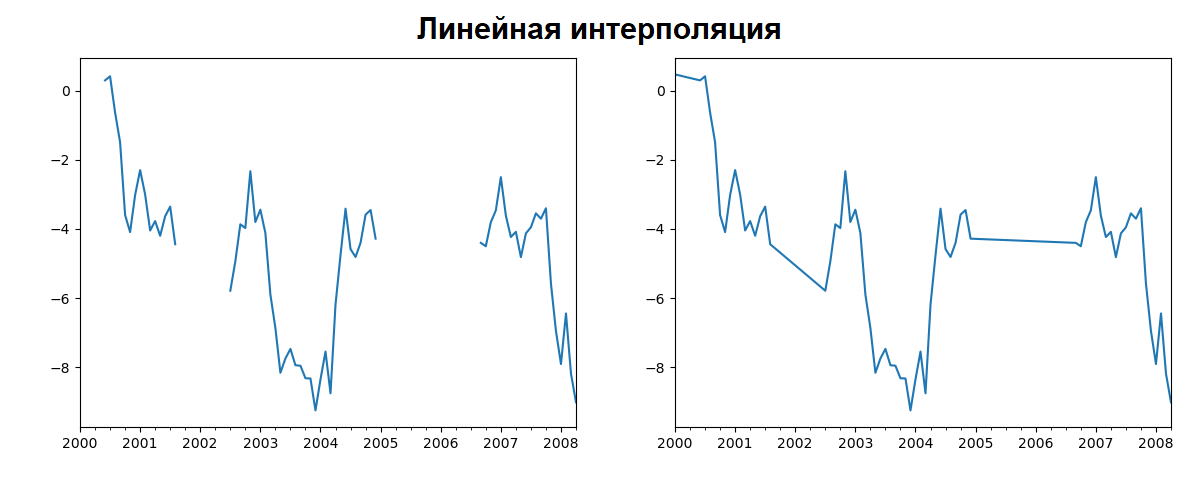

In [ ]:
stocks_part.interpolate()

In [ ]:
stocks_part.interpolate('polynomial', order=3)

### Заполнение пропусков внутри группы

In [ ]:
path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl).iloc[:, [0, 1, 2, -2]].astype({'employee_evaluation': float})
empl.head()

In [ ]:
empl['employee_evaluation'].isna().sum()

Заполняем ближайшим заполненным значением

In [ ]:
empl.assign(employee_evaluation = lambda x: x
            .groupby('i_pernr')
            ['employee_evaluation'].fillna(method='bfill'))

In [ ]:
(empl
    .assign(employee_evaluation = lambda x: x
            .groupby('i_pernr')
            ['employee_evaluation'].fillna(method='bfill'))
    ['employee_evaluation']
    .isna()
    .sum()
)

In [ ]:
(empl
    .assign(employee_evaluation = lambda x: x
            .groupby('i_pernr')
            ['employee_evaluation'].fillna(method='bfill'))
 
    .groupby('i_pernr')
    .filter(lambda x: x['employee_evaluation'].isna().sum() > 0)
 
)

In [ ]:
empl.assign(employee_evaluation = lambda x: x
            .groupby('i_pernr')
            ['employee_evaluation']
            .transform(lambda y: y.fillna(y.mean()).round())
        ).head()

Считаем количесвто пропусков после заполнения

In [ ]:
empl.assign(employee_evaluation = lambda x: x
            .groupby('i_pernr')
            ['employee_evaluation']
            .transform(lambda y: y.fillna(y.mean()).round())
        )['employee_evaluation'].isna().sum()

# Задания

#### Описание таблиц лежит [здесь](https://github.com/victorlymarev/pandas/tree/main/tables#%D0%BE%D0%BF%D0%B8%D1%81%D0%B0%D0%BD%D0%B8%D0%B5-%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86)

Некоторые таблицы занимают много памяти, поэтому каждые 5-10 заданий лучше перезапускайте ноутбук.

В формулировке некоторых заданий может содержаться вариативность. Если у вас есть сомнения, что требуется в задании, попробуйте решить несколько вариантов. Если вы не понимаете задание, можете написать об этом в комментариях под видео.

В большинстве случаев внешний вид итоговой таблицы не определен. Выведите на экран наиболее адекватный вариант. То есть таблицу, из которой можно будет сделать выводы.

Курс пока находится в разработке. Вы можете помочь другим людям добавив свое решение [сюда](https://docs.google.com/forms/d/1HYTBz_KfssY3Jps2dC3n0YnEqa6WBb5OIhLo1d32Xzw/edit).

Посмотреть решения других людей можно [здесь](https://docs.google.com/spreadsheets/d/1pMDYO-9UneLbPPnEuQ2shig0TOJdQTU-zipifyAnZMk/edit?resourcekey#gid=1998648012)

### Задание 1

Посмотрите на таблицу. В каких колонках есть пропуски?

Заполните пропуски значением -1

In [ ]:
# таблица sales - большая, и в некоторых случаях ваш компьютер может не справиться с ее обработкой
# поэтому лучше работайте с частью этой таблицы
# но если вы хотите попробовать поработать с полной версией таблицы,
# можете заменить переменную path_sales_2022 на path_sales внутри функции read_parquet

import os
import pandas as pd

path_sales_2022 = '../tables/sales_2022.parquet' if os.path.exists('../tables/sales_2022.parquet') else 'https://drive.google.com/uc?id=17e7FwXVdsWc2aziK9s5KidIvPcfKt9F5'
# path_sales = '../tables/sales.parquet' if os.path.exists('../tables/sales.parquet') else "https://drive.usercontent.google.com/download?id=15KwSxyM6hpNABGe6_vsrFZvD09VfHFyK&export=download&authuser=1&confirm=t&uuid=115bd48c-cc2c-4f2a-8b42-be5ca6ef6db8&at=APZUnTUVb8nfNANw5wr9Cad7PJ3U:1693327774694"

sales = pd.read_parquet(path_sales_2022)
sales.head()

In [ ]:
# напишите свой код здесь

### Задание 2

Из таблицы выкиньте строки, в которых есть пропуски

In [ ]:
# таблица sales - большая, и в некоторых случаях ваш компьютер может не справиться с ее обработкой
# поэтому лучше работайте с частью этой таблицы
# но если вы хотите попробовать поработать с полной версией таблицы,
# можете заменить переменную path_sales_2022 на path_sales внутри функции read_parquet

import os
import pandas as pd

path_sales_2022 = '../tables/sales_2022.parquet' if os.path.exists('../tables/sales_2022.parquet') else 'https://drive.google.com/uc?id=17e7FwXVdsWc2aziK9s5KidIvPcfKt9F5'
# path_sales = '../tables/sales.parquet' if os.path.exists('../tables/sales.parquet') else "https://drive.usercontent.google.com/download?id=15KwSxyM6hpNABGe6_vsrFZvD09VfHFyK&export=download&authuser=1&confirm=t&uuid=115bd48c-cc2c-4f2a-8b42-be5ca6ef6db8&at=APZUnTUVb8nfNANw5wr9Cad7PJ3U:1693327774694"

sales = pd.read_parquet(path_sales_2022)
sales.head()

In [ ]:
# напишите свой код здесь

### Задание 3

Из таблицы выкиньте колонки, в которых есть пропуски

In [ ]:
# таблица sales - большая, и в некоторых случаях ваш компьютер может не справиться с ее обработкой
# поэтому лучше работайте с частью этой таблицы
# но если вы хотите попробовать поработать с полной версией таблицы,
# можете заменить переменную path_sales_2022 на path_sales внутри функции read_parquet

import os
import pandas as pd

path_sales_2022 = '../tables/sales_2022.parquet' if os.path.exists('../tables/sales_2022.parquet') else 'https://drive.google.com/uc?id=17e7FwXVdsWc2aziK9s5KidIvPcfKt9F5'
# path_sales = '../tables/sales.parquet' if os.path.exists('../tables/sales.parquet') else "https://drive.usercontent.google.com/download?id=15KwSxyM6hpNABGe6_vsrFZvD09VfHFyK&export=download&authuser=1&confirm=t&uuid=115bd48c-cc2c-4f2a-8b42-be5ca6ef6db8&at=APZUnTUVb8nfNANw5wr9Cad7PJ3U:1693327774694"

sales = pd.read_parquet(path_sales_2022)
sales.head()

In [ ]:
# напишите свой код здесь

### Задание 4

Заполните пропуски в таблице marks мединой по каждому из предметов

In [ ]:
import os
import pandas as pd
import numpy as np

path_marks = '../tables/оценки.xlsx' if os.path.exists('../tables/оценки.xlsx') else 'https://drive.google.com/uc?id=17f4DXx53J0WooNkhO13xidseZJ-O2obs'

marks = pd.read_excel(path_marks)
np.random.seed(135)
marks.iloc[:, 2:] *= np.random.choice([1, np.nan], p=[0.85, 0.15], size=marks.iloc[:, 2:].shape)
marks.head()

In [ ]:
# напишите свой код здесь

### Задание 5

Заполните пропуск в таблице marks средней оценкой школника. Не забудьте округлить результат

In [ ]:
import os
import pandas as pd
import numpy as np

path_marks = '../tables/оценки.xlsx' if os.path.exists('../tables/оценки.xlsx') else 'https://drive.google.com/uc?id=17f4DXx53J0WooNkhO13xidseZJ-O2obs'

marks = pd.read_excel(path_marks)
np.random.seed(1)
marks.iloc[:, 2:] *= np.random.choice([1, np.nan], p=[0.85, 0.15], size=marks.iloc[:, 2:].shape)
marks.head()

In [ ]:
# напишите свой код здесь

### Задание 6

В таблице stocks заполните пропуски средним значением за каждый месяц

In [ ]:
import os
import pandas as pd

path_stocks = '../tables/stocks.parquet' if os.path.exists('../tables/stocks.parquet') else 'https://drive.google.com/uc?id=1weGquTtmR92mKYAeZhZCFHJjndyoSXZt'

stocks = pd.read_parquet(path_stocks).asfreq('d')
stocks.head()

In [ ]:
# напишите свой код здесь

### Задание 7

Заполните пропуски, используя линейную интерполяцию (либо любую другую на ваш выбор)

In [ ]:
import os
import pandas as pd
path_xdg_usdt = '../tables/XDGUSDT.csv' if os.path.exists('../tables/XDGUSDT.csv') else 'https://drive.google.com/uc?id=1oLjCNOsdKbd87sIgW0_OWDpD2DVHAAAV'
xdg_usdt = pd.read_csv(path_xdg_usdt, header=None).set_axis(['Дата', 'Цена', 'Объем'], axis=1)
np.random.seed(12689)
xdg_usdt.iloc[:, 1:] *= np.random.choice([1, np.nan], p=[0.65, 0.35], size=len(xdg_usdt)).reshape(-1, 1)
xdg_usdt.head()

In [ ]:
# напишите свой код здесь